In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [4]:
#Load Data
data = pd.read_csv('housing 2 (1).csv')

In [ ]:
#Explore Data

In [5]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
data.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


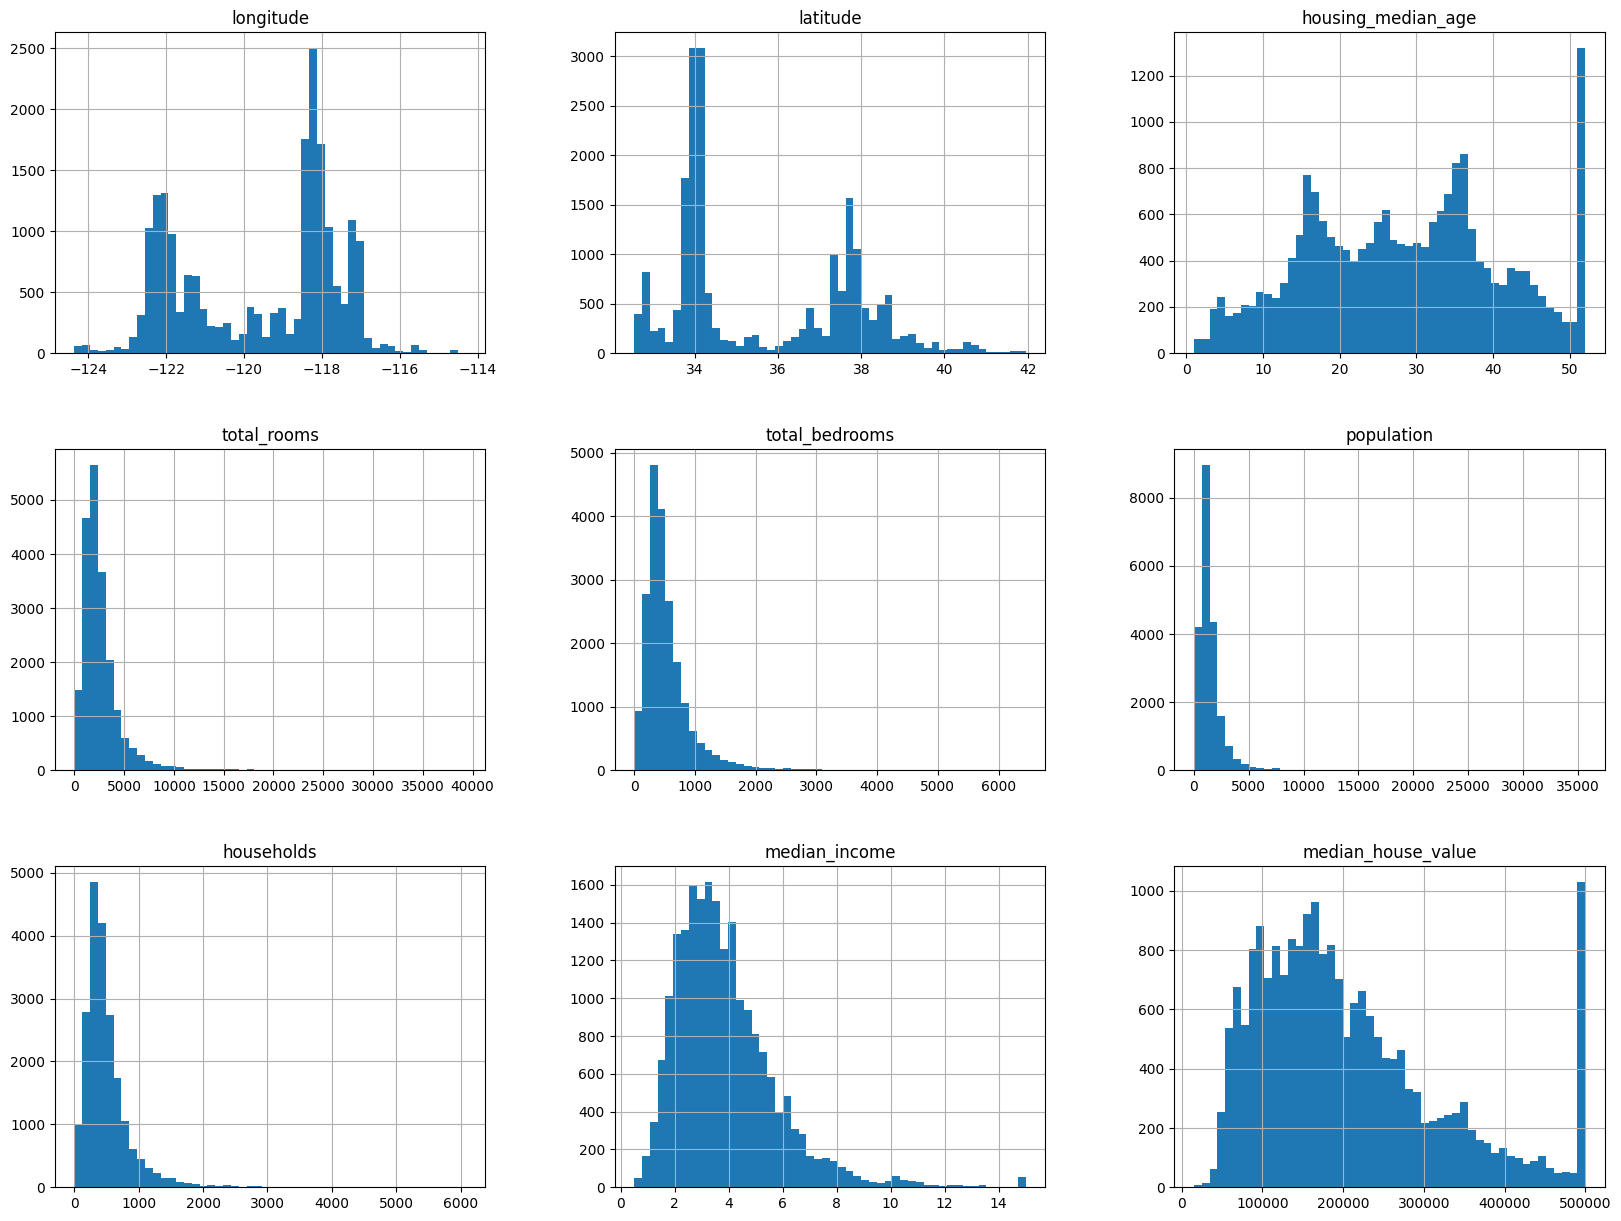

In [6]:
# Plot histogram

data.hist(bins=50, figsize=(20, 15))
plt.show()

In [ ]:
#Considering the different scales of the attributes, it's a good idea to make sure they're all on the same scale.
#We're seeing a big jump in median house values around 500,000, which looks pretty unusual compared to the rest.
#It might be best to leave these out when we train our model.
#The median income seems to hover around 3, but it's not clear what exactly that represents in terms of dollars.
#It could be around $30,000, but we need to confirm the units.

In [7]:
data.describe()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
#add a new categorical feature in order to split the dataset properly

#delete new feature later

In [8]:
data['income_cat'] = np.ceil(data['median_income']/1.5)
data['income_cat'].where(data['income_cat']<5, 5, inplace=True)

(array([ 822.,    0., 6581.,    0.,    0., 7236.,    0., 3639.,    0.,
        2362.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

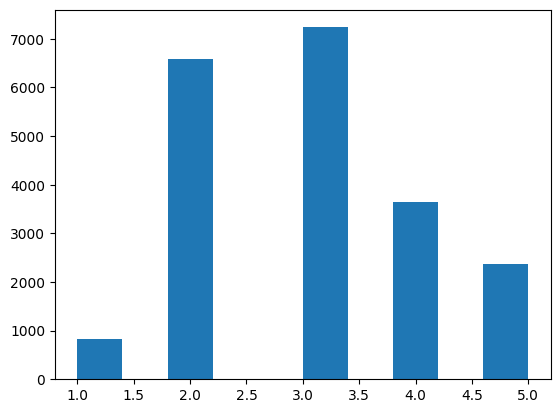

In [9]:
#Plot hist for income_cat
plt.hist(data.income_cat)

In [10]:
data.income_cat.value_counts()/len(data.income_cat)


income_cat
3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: count, dtype: float64

In [11]:
#Splitting data in training and testing
#using 2 packages
#Package 1- train_test_split without the new feature
#Package 2- StratifiedShuffleSplit with the new feature

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
data4train,data4test = train_test_split(data, test_size=0.2, random_state=42)

In [14]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state = 42)

In [15]:
for train_index, test_index in split.split(data, data['income_cat']):
    train_set = data.loc[train_index]
    test_set  = data.loc[test_index]

In [ ]:
#comparing these two split methods

In [16]:
def table4income_cat(dataset,df,label):
    df[label]=pd.Series(dataset['income_cat'].value_counts()/len(dataset['income_cat']))
    return df

In [17]:
df = pd.DataFrame()
df = table4income_cat(train_set,df,'All_set')
df = table4income_cat(train_set,df,'train_set_Shuff')
df = table4income_cat(test_set,df,'test_set_Shuff')
df = table4income_cat(data4train,df,'train_set_split')
df = table4income_cat(data4test,df,'test_set_split')
df

,All_set,train_set_Shuff,test_set_Shuff,train_set_split,test_set_split
income_cat,,,,,
3.0,0.350594,0.350594,0.350533,0.348595,0.358527
2.0,0.318859,0.318859,0.318798,0.317466,0.324370
4.0,0.176296,0.176296,0.176357,0.178537,0.167393
5.0,0.114462,0.114462,0.114341,0.115673,0.109496
1.0,0.039789,0.039789,0.039971,0.039729,0.040213


In [ ]:
#StratifiedShuffleSplit method works better
# train data and test data are closer to that in the all dataset (incoem category)

In [ ]:
#delete new features after split

In [18]:
# delete the new feature
for set_ in (data, data4train, data4test, train_set, test_set):
    set_.drop("income_cat",axis=1,inplace=True)

In [19]:
data4train.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [20]:
housing4train = train_set.copy()

In [21]:
housing4train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN


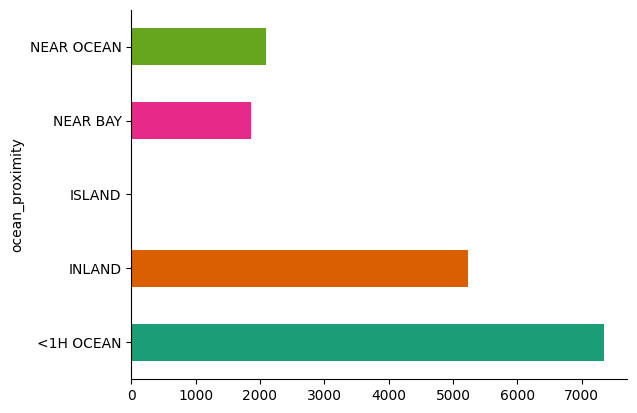

In [22]:
from matplotlib import pyplot as plt
import seaborn as sns
data4train.groupby('ocean_proximity').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

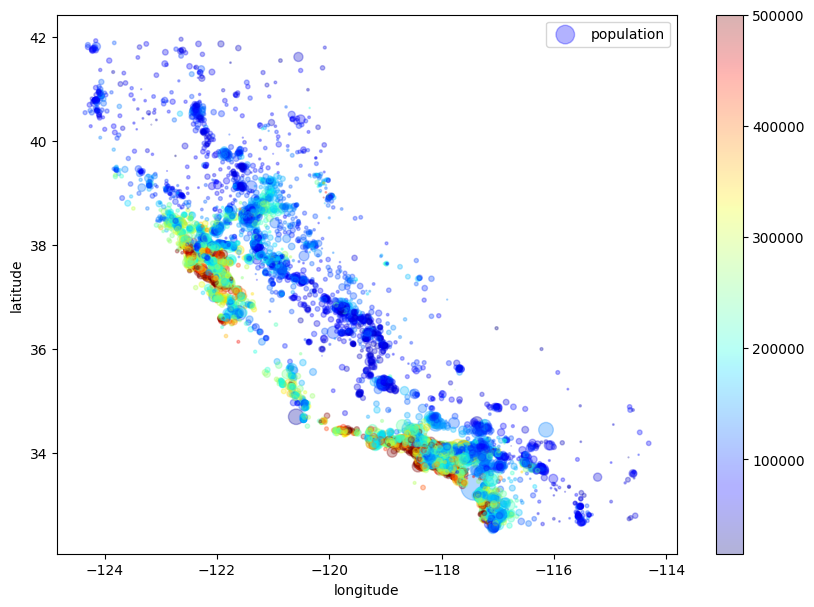

In [23]:
housing4train.plot(kind='scatter', x='longitude', y='latitude', alpha=0.3,
         s=housing4train['population']/100, label='population',   # set symbol size on population
         c=housing4train['median_house_value'],                  #  set symbol color on house value
         cmap=plt.get_cmap('jet'),
         colorbar=True,
         figsize=(10,7))
plt.legend()

In [24]:
!pip install folium

In [25]:
!pip install geopy


In [26]:
import folium

from geopy.geocoders import Nominatim

In [27]:
def get_latlon(address):
    geolocator = Nominatim()
    location   = geolocator.geocode(address)
    latitude   = location.latitude
    longitude  = location.longitude
    return latitude, longitude

In [ ]:
#correlation analyisis

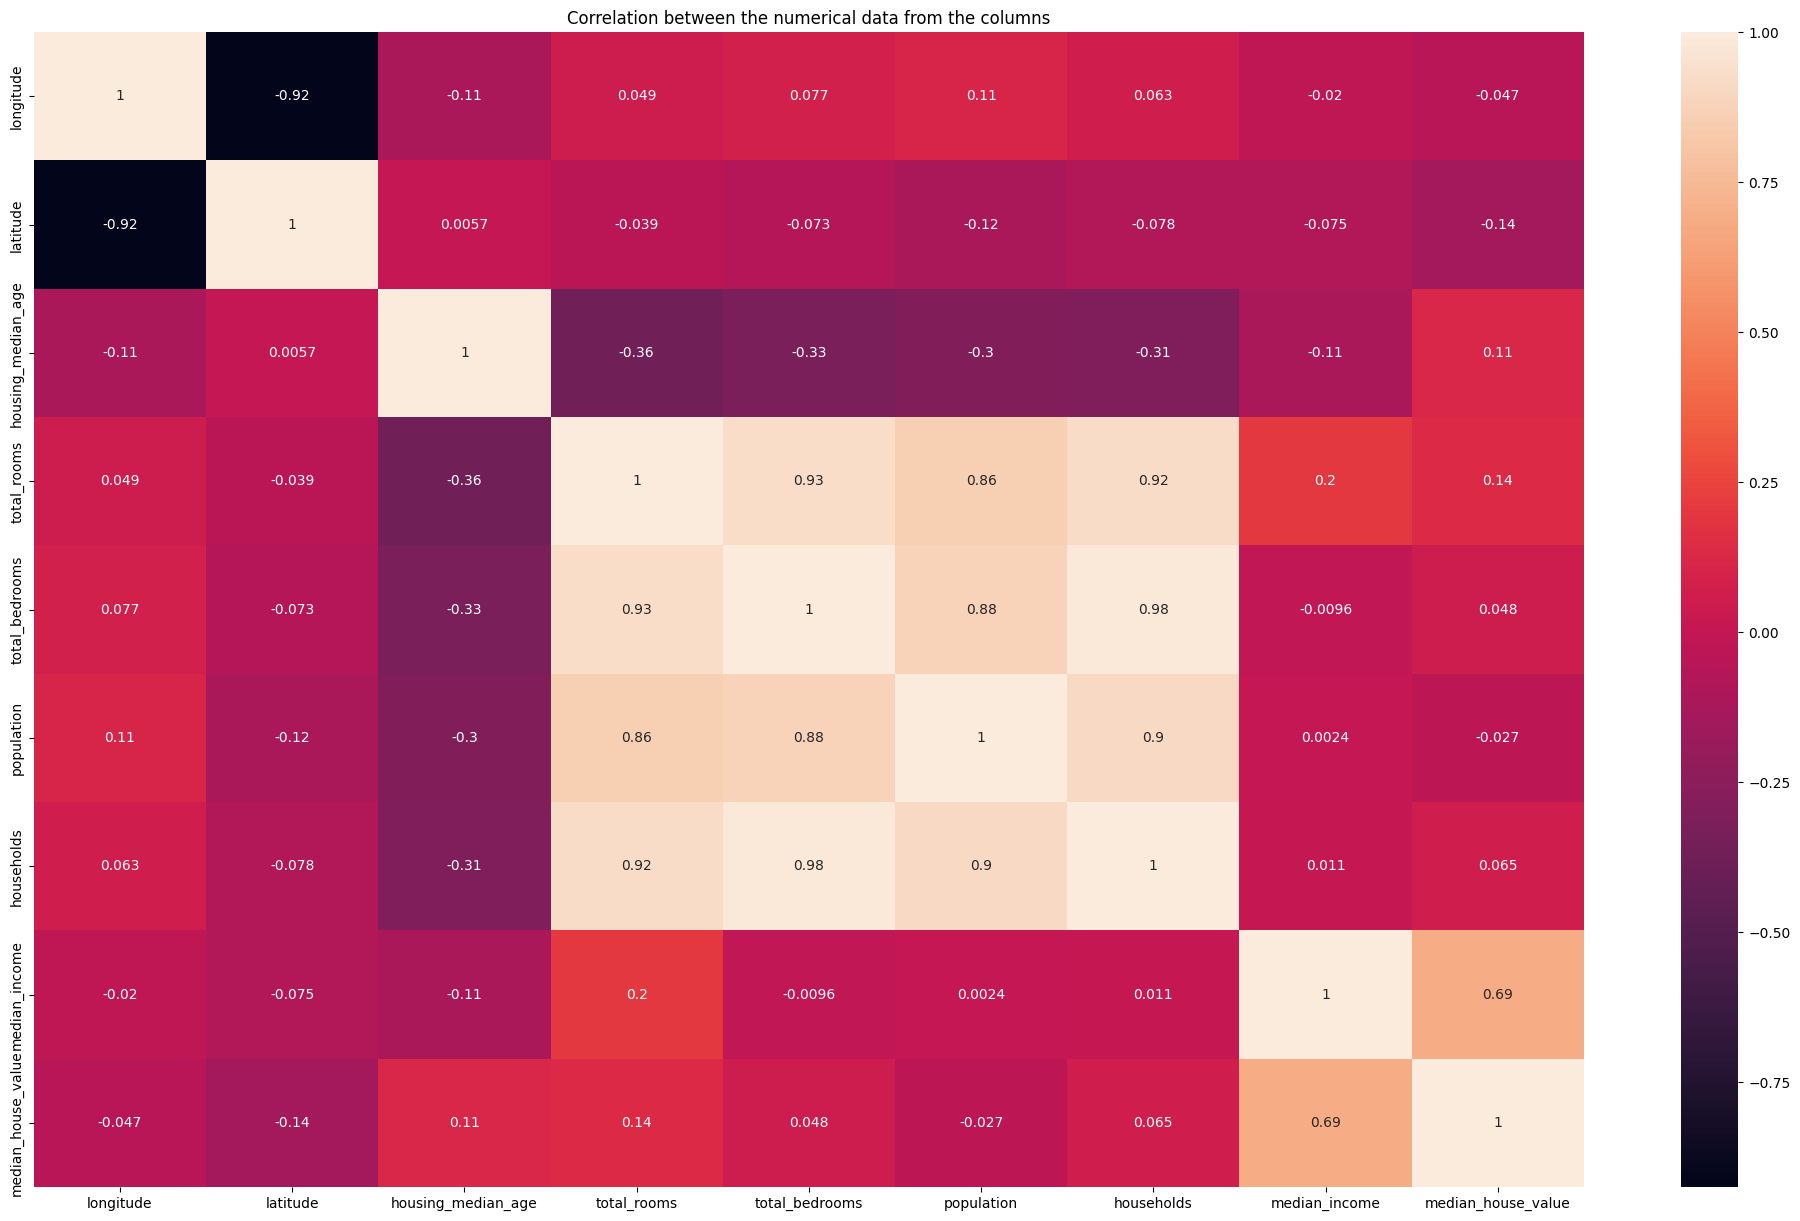

In [28]:
#sns.heatmap(housing4train.corr(),annot=True)



# Select only the numerical columns from the data
numerical_data = housing4train.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix for the numerical data
california_heatmap = numerical_data.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(25,15))
sns.heatmap(california_heatmap, annot=True, cmap='rocket').set(
    title = "Correlation between the numerical data from the columns"
)
plt.xticks(rotation=360)
plt.show()

In [31]:
corr_matrix = numerical_data.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)


median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

In [32]:
# show correlation matrix
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105823,0.048909,0.076686,0.108071,0.063146,-0.019615,-0.047466
latitude,-0.924478,1.000000,0.005737,-0.039245,-0.072550,-0.115290,-0.077765,-0.075146,-0.142673
housing_median_age,-0.105823,0.005737,1.000000,-0.364535,-0.325101,-0.298737,-0.306473,-0.111315,0.114146
total_rooms,0.048909,-0.039245,-0.364535,1.000000,0.929391,0.855103,0.918396,0.200133,0.135140
total_bedrooms,0.076686,-0.072550,-0.325101,0.929391,1.000000,0.876324,0.980167,-0.009643,0.047781
population,0.108071,-0.115290,-0.298737,0.855103,0.876324,1.000000,0.904639,0.002421,-0.026882
households,0.063146,-0.077765,-0.306473,0.918396,0.980167,0.904639,1.000000,0.010869,0.064590
median_income,-0.019615,-0.075146,-0.111315,0.200133,-0.009643,0.002421,0.010869,1.000000,0.687151
median_house_value,-0.047466,-0.142673,0.114146,0.135140,0.047781,-0.026882,0.064590,0.687151,1.000000


In [33]:
df = corr_matrix.tail(1).T
df

,median_house_value
longitude,-0.047466
latitude,-0.142673
housing_median_age,0.114146
total_rooms,0.135140
total_bedrooms,0.047781
population,-0.026882
households,0.064590
median_income,0.687151
median_house_value,1.000000


In [36]:
df.sort_values(by='median_house_value',inplace=True)
df

,median_house_value
latitude,-0.142673
longitude,-0.047466
population,-0.026882
total_bedrooms,0.047781
households,0.064590
housing_median_age,0.114146
total_rooms,0.135140
median_income,0.687151
median_house_value,1.000000


In [35]:
features = list(df[abs(df['median_house_value'])>0.1].T.columns)
features

['latitude',
 'housing_median_age',
 'total_rooms',
 'median_income',
 'median_house_value']

In [ ]:
#More correlations is found between the
#median house value and income, total_rooms, and house age

In [34]:
from pandas.plotting import scatter_matrix

In [35]:
from plotly.graph_objs import Scatter,Layout
import plotly
import plotly.offline as py
import plotly.graph_objs as go

In [36]:
plotly.offline.init_notebook_mode(connected=True)

In [37]:
trace0 = go.Scatter(x=data['median_income'], y=data['median_house_value'], mode = 'markers', name = 'value vs income')

In [38]:
# Attribute combination

In [ ]:
#If we don't know the population, the total rooms in a district don't tell us much about the house price. Instead, what really matters is how many people live in each house. So, it would make sense to add a new feature called "population_per_household."



In [39]:
housing4train['population_per_household'] = housing4train['population']/housing4train['households']

In [40]:
housing4train['bedrooms_per_room'] = housing4train['total_bedrooms']/housing4train['total_rooms']
housing4train['rooms_per_household'] = housing4train['total_rooms']/housing4train['households']

In [41]:
#corr_matrix = housing4train.corr()

<Axes: >

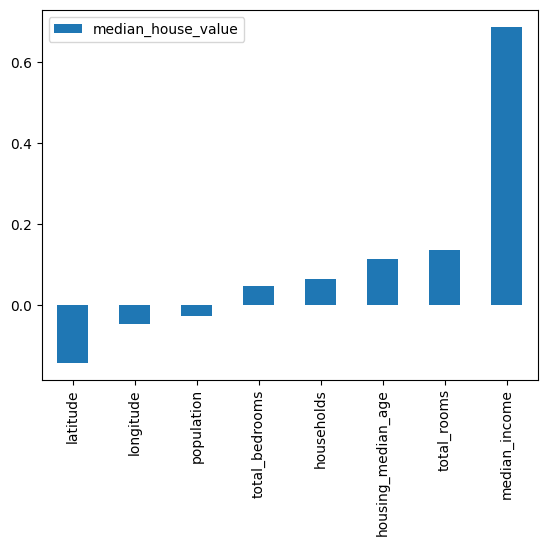

In [42]:
df.drop(index='median_house_value',inplace=True)
df.plot(kind='bar')

In [45]:
features = list(df[abs(df['median_house_value'])>0.15].T.columns)
features

['median_income', 'median_house_value']

In [ ]:
#Prepare Data for Machine Learning Algorithm

In [46]:
X_train = data4train.drop("median_house_value",axis=1)
y_train = data4train["median_house_value"].copy()


In [47]:
X_train.shape,y_train.shape


((16512, 9), (16512,))

In [41]:
X_test = data4test.drop("median_house_value",axis=1)
y_test = data4test["median_house_value"].copy()

In [ ]:
#Check for missing data

In [39]:
#missing data
def report_missing_data(dataset):
    total = dataset.isnull().sum().sort_values(ascending=False)
    percent = dataset.isnull().sum()/total

    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    missing_data.plot(kind='bar',y='Total',figsize=(10,6),fontsize=20)
    print(missing_data)

                    Total  Percent
total_bedrooms        207      1.0
longitude               0      NaN
latitude                0      NaN
housing_median_age      0      NaN
total_rooms             0      NaN
population              0      NaN
households              0      NaN
median_income           0      NaN
ocean_proximity         0      NaN


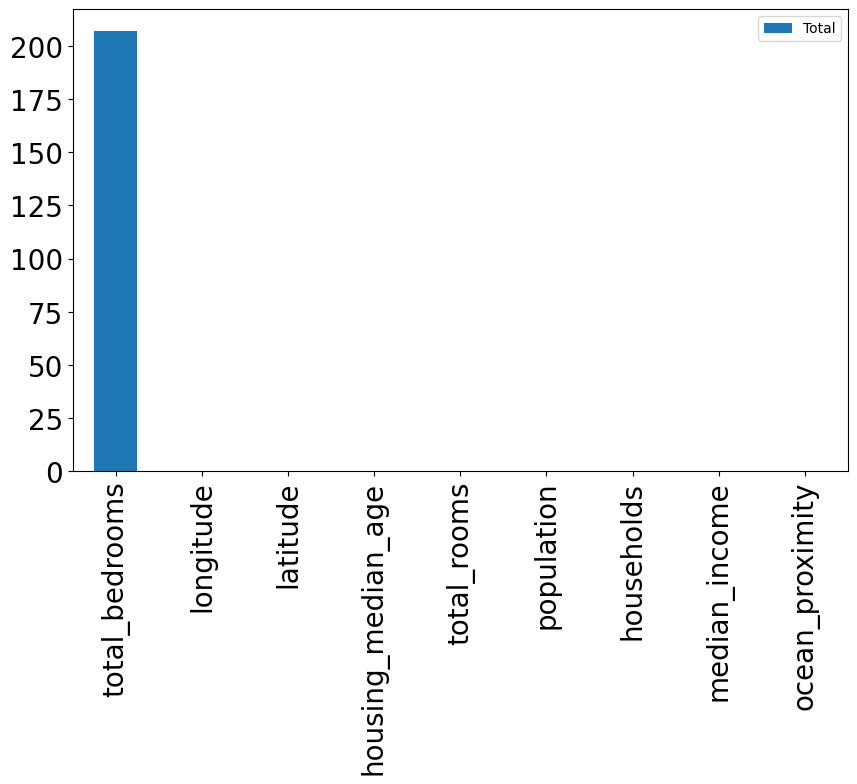

In [43]:
report_missing_data(X_test)

                    Total  Percent
longitude               0      NaN
latitude                0      NaN
housing_median_age      0      NaN
total_rooms             0      NaN
total_bedrooms          0      NaN
population              0      NaN
households              0      NaN
median_income           0      NaN
ocean_proximity         0      NaN


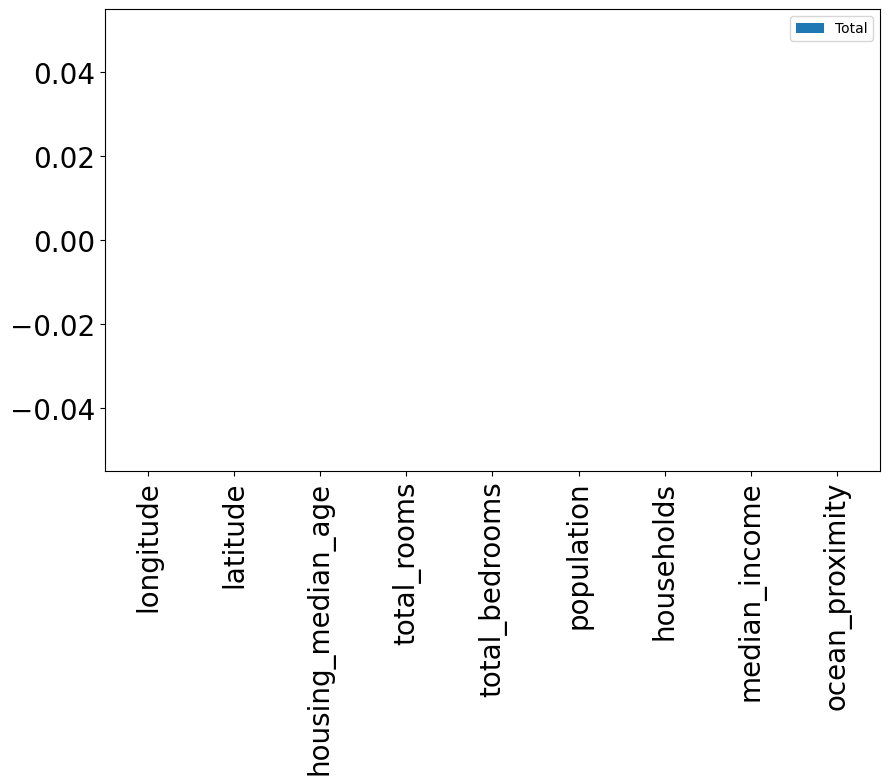

In [48]:
report_missing_data(X_train)


In [49]:
X_train = train_set.drop("median_house_value",axis=1)
y_train = train_set["median_house_value"].copy()


X_test = test_set.drop("median_house_value",axis=1)
y_test = test_set["median_house_value"].copy()

In [50]:
X_train = train_set.drop("median_house_value",axis=1)
y_train = train_set["median_house_value"].copy()

X_test = test_set.drop("median_house_value",axis=1)
y_test = test_set["median_house_value"].copy()

                    Total  Percent
total_bedrooms        158      1.0
longitude               0      NaN
latitude                0      NaN
housing_median_age      0      NaN
total_rooms             0      NaN
population              0      NaN
households              0      NaN
median_income           0      NaN
ocean_proximity         0      NaN


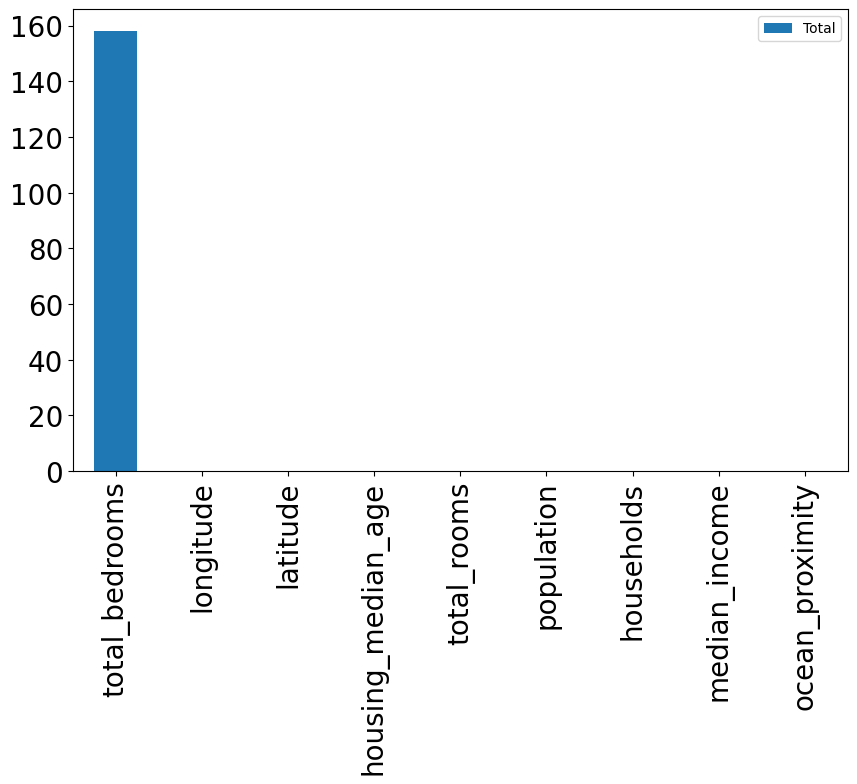

In [51]:
report_missing_data(X_train)

In [ ]:
#Cleaning data and  missing values

In [52]:
X_train['total_bedrooms'].isnull().sum()


158

In [53]:
missing_feature = pd.DataFrame(X_train.isnull().sum().sort_values(ascending=False)).index[0]
missing_feature

'total_bedrooms'

In [ ]:
#total_bedrooms has missing values

In [54]:
median=X_train[missing_feature].median()
X_train[missing_feature]=X_train[missing_feature].replace(np.nan,median)
X_train[missing_feature].isnull().sum()

0

In [55]:
median=X_test[missing_feature].median()
X_test[missing_feature]=X_test[missing_feature].replace(np.nan,median)
X_test[missing_feature].isnull().sum()


0

In [ ]:
#Categorical data with one-hot encoding

In [56]:
X_train['ocean_proximity'].unique()

array(['INLAND', 'NEAR OCEAN', '<1H OCEAN', 'NEAR BAY', 'ISLAND'],
      dtype=object)

In [57]:
housing_num = X_train.drop("ocean_proximity",axis=1)
num_attribs = list(housing_num)

In [58]:
#checking for updated attributes
num_attribs

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

In [59]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,RobustScaler
#from sklearn.preprocessing import Imputer
from sklearn.impute import SimpleImputer

from sklearn.pipeline import FeatureUnion
#CategoricalEncoder(encoding='onehot-dense')


from sklearn.base import BaseEstimator,TransformerMixin
#select columns and transit to array

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from sklearn.preprocessing import LabelEncoder
from scipy import sparse

class CategoricalEncoder(BaseEstimator, TransformerMixin):


    def __init__(self, encoding='onehot', categories='auto', dtype=np.float64,
                 handle_unknown='error'):
        self.encoding = encoding
        self.categories = categories
        self.dtype = dtype
        self.handle_unknown = handle_unknown

    def fit(self, X, y=None):

        if self.encoding not in ['onehot', 'onehot-dense', 'ordinal']:
            template = ("encoding should be either 'onehot', 'onehot-dense' "
                        "or 'ordinal', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.handle_unknown not in ['error', 'ignore']:
            template = ("handle_unknown should be either 'error' or "
                        "'ignore', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.encoding == 'ordinal' and self.handle_unknown == 'ignore':
            raise ValueError("handle_unknown='ignore' is not supported for"
                             " encoding='ordinal'")

        X = check_array(X, dtype=object, accept_sparse='csc', copy=True)
        n_samples, n_features = X.shape

        self._label_encoders_ = [LabelEncoder() for _ in range(n_features)]

        for i in range(n_features):
            le = self._label_encoders_[i]
            Xi = X[:, i]
            if self.categories == 'auto':
                le.fit(Xi)
            else:
                valid_mask = np.in1d(Xi, self.categories[i])
                if not np.all(valid_mask):
                    if self.handle_unknown == 'error':
                        diff = np.unique(Xi[~valid_mask])
                        msg = ("Found unknown categories {0} in column {1}"
                               " during fit".format(diff, i))
                        raise ValueError(msg)
                le.classes_ = np.array(np.sort(self.categories[i]))

        self.categories_ = [le.classes_ for le in self._label_encoders_]

        return self

    def transform(self, X):
        X = check_array(X, accept_sparse='csc', dtype=object, copy=True)
        n_samples, n_features = X.shape
        X_int = np.zeros_like(X, dtype=int)
        X_mask = np.ones_like(X, dtype=bool)

        for i in range(n_features):
            valid_mask = np.in1d(X[:, i], self.categories_[i])

            if not np.all(valid_mask):
                if self.handle_unknown == 'error':
                    diff = np.unique(X[~valid_mask, i])
                    msg = ("Found unknown categories {0} in column {1}"
                           " during transform".format(diff, i))
                    raise ValueError(msg)
                else:
                    X_mask[:, i] = valid_mask
                    X[:, i][~valid_mask] = self.categories_[i][0]
            X_int[:, i] = self._label_encoders_[i].transform(X[:, i])

        if self.encoding == 'ordinal':
            return X_int.astype(self.dtype, copy=False)

        mask = X_mask.ravel()
        n_values = [cats.shape[0] for cats in self.categories_]
        n_values = np.array([0] + n_values)
        indices = np.cumsum(n_values)

        column_indices = (X_int + indices[:-1]).ravel()[mask]
        row_indices = np.repeat(np.arange(n_samples, dtype=np.int32),
                                n_features)[mask]
        data = np.ones(n_samples * n_features)[mask]

        out = sparse.csc_matrix((data, (row_indices, column_indices)),
                                shape=(n_samples, indices[-1]),
                                dtype=self.dtype).tocsr()
        if self.encoding == 'onehot-dense':
            return out.toarray()
        else:
            return out

class DataFrameSelector(BaseEstimator,TransformerMixin):
    def __init__(self,feature_names):
        self.feature_names = feature_names
    def fit(self,X,y=None):
        return self
    def transform(self,X):
        return X[self.feature_names].values


# build pipelines
cat_attribs = ['ocean_proximity']
num_attribs = list(housing_num)

num_pipeline = Pipeline([
               ('selector',DataFrameSelector(num_attribs)),
               ('std_scaler',StandardScaler()),
                ])

# build categorical pipeline
cat_pipeline = Pipeline([
                  ('selector',DataFrameSelector(cat_attribs)),
                  ('cat_encoder',CategoricalEncoder(encoding='onehot-dense')),
              ])


# concatenate all the transforms using "FeatureUnion"
pipelines = FeatureUnion(transformer_list=
                             [
                              ('num_pipeline',num_pipeline),
                              ('cat_pipeline',cat_pipeline),
                             ])

In [60]:
X_train_prepared = pipelines.fit_transform(X_train)


In [61]:
X_train_prepared.shape

(16512, 13)

In [62]:
type(X_train_prepared)

numpy.ndarray

# Select and train the model

In [63]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

def model_performace(model,X,y):
    model.fit(X,y)
    pred = model.predict(X)
    scores = np.sqrt(mean_squared_error(pred,y))

    print("scores:",scores)
    print("Mean:",scores.mean())
    print("Standard Deviation:",scores.std())
    return model,pred

In [64]:
def plot_pred_true(ypred,ytrue):
    df = pd.DataFrame([ypred,ytrue]).T
    df.columns=['pred','true']
    plt.scatter(df['pred'],df['true'])

# Linear regression(prone to under fit the data)

In [66]:
from sklearn.linear_model import LinearRegression

In [65]:
# Creating a Linear Regression model
linear_reg_model = LinearRegression()

# Evaluating the performance of the Linear Regression model
lr_model,ypred = model_performace(linear_reg_model,X_train_prepared, y_train)

scores: 69050.56219504567
Mean: 69050.56219504567
Standard Deviation: 0.0


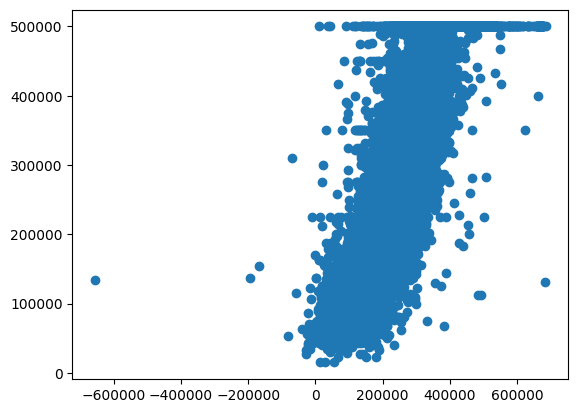

In [67]:
# Plotting predicted vs true values

plot_pred_true(ypred,y_train)

# Support vector machine

In [68]:
from sklearn import svm

Mean Squared Error: 14057758430.926634


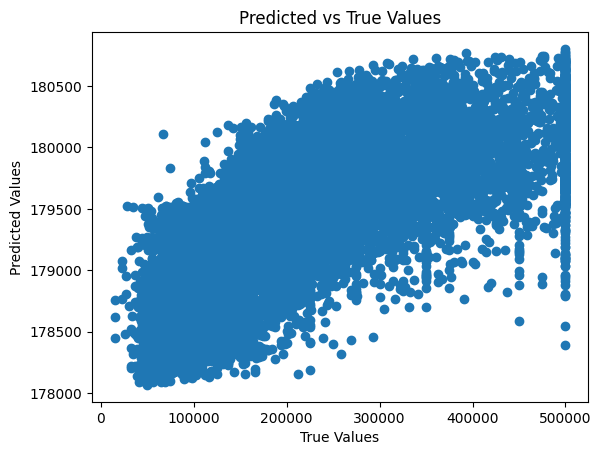

In [91]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

def model_performance(model, X, y):
    # Fit the model
    model.fit(X, y)
    # Predict on the training set
    y_pred = model.predict(X)
    # Calculate Mean Squared Error
    mse = mean_squared_error(y, y_pred)
    print("Mean Squared Error:", mse)
    return model, y_pred

def plot_pred_true(y_pred, y_true):
    plt.scatter(y_true, y_pred)
    plt.xlabel("True Values")
    plt.ylabel("Predicted Values")
    plt.title("Predicted vs True Values")
    plt.show()


from sklearn.svm import SVR

# Creating a Support Vector Machine (SVM) model
svm_model = SVR()

# Evaluating the performance of the SVM model
svm_model, y_pred_svm = model_performance(svm_model, X_train_prepared, y_train)

# Plotting predicted vs true values for SVM
plot_pred_true(y_pred_svm, y_train)


# from sklearn.svm import SVR

# # Creating a Support Vector Machine (SVM) model
# svm_model = SVR()

# # Evaluating the performance of the SVM model
# svm_model, y_pred_svm = model_performance(svm_model, X_train_prepared, y_train)

# # Plotting predicted vs true values for SVM
#lot_pred_true(y_pred_svm, y_train)

# Decision Tree

Mean Squared Error: 0.0


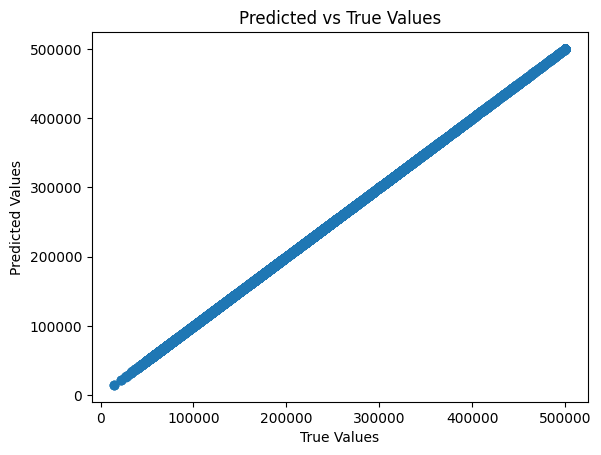

In [70]:
from sklearn.tree import DecisionTreeRegressor

# Creating a Decision Tree model
decision_tree_model = DecisionTreeRegressor()

# Evaluating the performance of the Decision Tree model
decision_tree_model, y_pred_dt = model_performance(decision_tree_model, X_train_prepared, y_train)

# Plotting predicted vs true values for Decision Tree
plot_pred_true(y_pred_dt, y_train)


# Cross Validation

In [73]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation with linear regression model
lr_cv_scores = cross_val_score(linear_reg_model, X_train_prepared, y_train, scoring='neg_mean_squared_error', cv=5)
lr_rmse_scores = np.sqrt(-lr_cv_scores)

# Print cross-validation scores
print("Cross-Validation Scores :", lr_rmse_scores)
print("Mean RMSE:", lr_rmse_scores.mean())
print("Standard Deviation RMSE:", lr_rmse_scores.std())


Cross-Validation Scores : [68906.16750279 68244.5107051  69961.21623633 70052.1498968
 68928.22700028]
Mean RMSE: 69218.45426825911
Standard Deviation RMSE: 689.5019503176211


# Random Forest

Mean Squared Error: 336466289.9152598


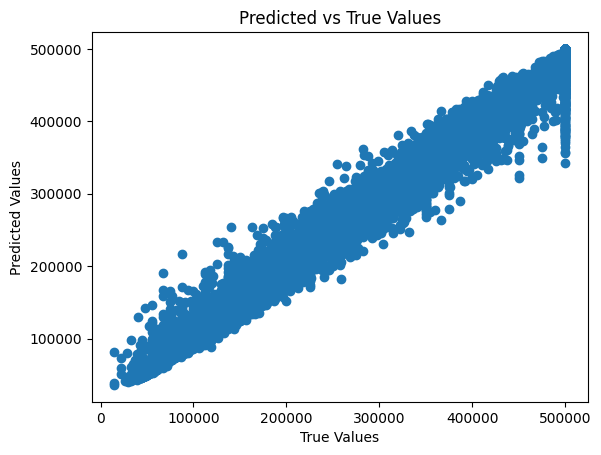

In [74]:
from sklearn.ensemble import RandomForestRegressor

# Creating a Random Forest model
random_forest_model = RandomForestRegressor()

# Evaluating the performance of the Random Forest model
random_forest_model, y_pred_rf = model_performance(random_forest_model, X_train_prepared, y_train)

# Plotting predicted vs true values for Random Forest
plot_pred_true(y_pred_rf, y_train)

# Perform cross-validation with Random Forest model
#rf_cv_scores = cross_val_score(random_forest_model, X_train_prepared, y_train, scoring='neg_mean_squared_error', cv=5)
#rf_rmse_scores = np.sqrt(-rf_cv_scores)

# Print cross-validation scores
#print("Cross-Validation Scores (Random Forest):", rf_rmse_scores)
#print("Mean RMSE (Random Forest):", rf_rmse_scores.mean())
#print("Standard Deviation RMSE (Random Forest):", rf_rmse_scores.std())


# Ridge Regression

In [83]:
from sklearn.linear_model import Ridge

# Creating a Ridge Regression model
ridge_model = Ridge()

# Evaluating the performance of the Ridge Regression model
ridge_model, y_pred_ridge = model_performance(ridge_model, X_train_prepared, y_train)

# Plotting predicted vs true values for Ridge Regression
#plot_pred_true(y_pred_ridge, y_train)

# Perform cross-validation with Ridge Regression model
#ridge_cv_scores = cross_val_score(ridge_model, X_train_prepared, y_train, scoring='neg_mean_squared_error', cv=5)
#ridge_rmse_scores = np.sqrt(-ridge_cv_scores)

# Print cross-validation scores
#print("Cross-Validation Scores (Ridge Regression):", ridge_rmse_scores)
#print("Mean RMSE (Ridge Regression):", ridge_rmse_scores.mean())
#print("Standard Deviation RMSE (Ridge Regression):", ridge_rmse_scores.std())


Mean Squared Error: 4768177598.357875


In [87]:
print("Coefficients of the Ridge Regression model:")
print(ridge_model.coef_)


Coefficients of the Ridge Regression model:
[-53105.09854985 -53968.44970578  13728.3482479   -9996.24886093
  29928.82480862 -43799.08489285  28867.57423994  73727.16647957
 -10075.42796109 -49796.84316825  80661.93216959 -14430.8916891
  -6358.76935196]


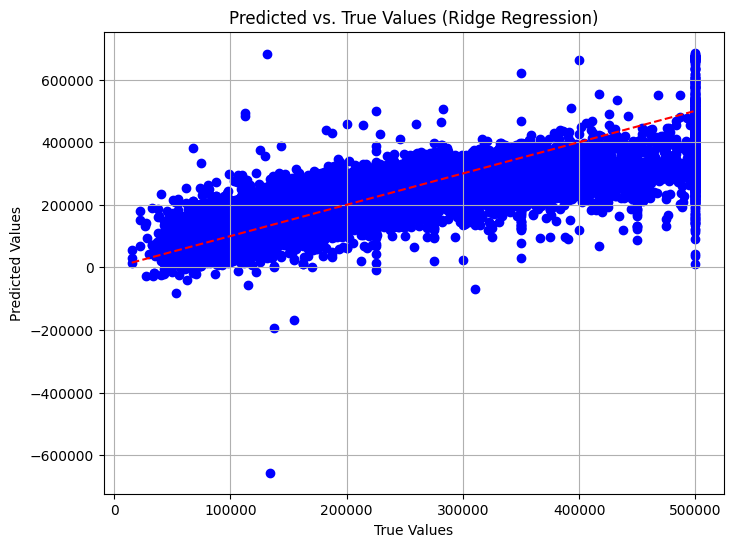

In [82]:
import matplotlib.pyplot as plt

def plot_pred_true(y_pred, y_true):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, y_pred, color='blue')
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='red', linestyle='--')
    plt.title('Predicted vs. True Values (Ridge Regression)')
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.grid(True)
    plt.show()

# Assuming y_pred_ridge and y_train are available
plot_pred_true(y_pred_ridge, y_train)


In [ ]:
#New Ridge

# Lasso Regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.468e+12, tolerance: 2.210e+10
  model = cd_fast.enet_coordinate_descent(


Mean Squared Error: 4767988470.227257


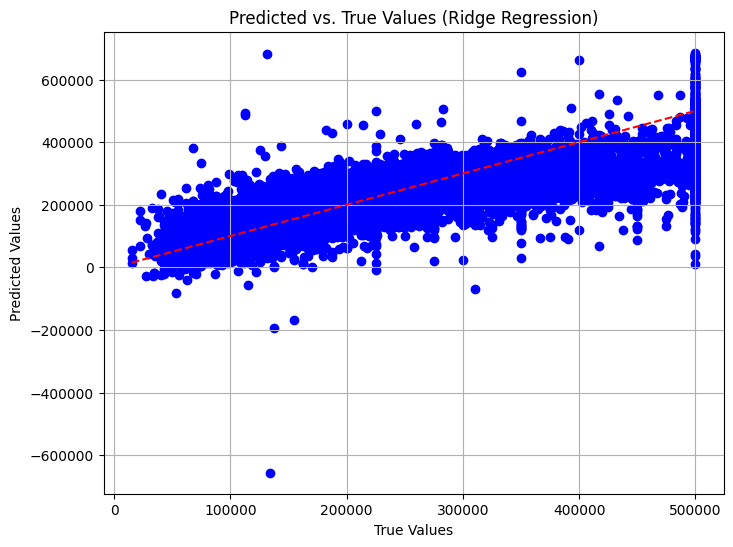

In [85]:
from sklearn.linear_model import Lasso

# Creating a Lasso Regression model
lasso_model = Lasso()

# Evaluating the performance of the Lasso Regression model
lasso_model, y_pred_lasso = model_performance(lasso_model, X_train_prepared, y_train)

# Plotting predicted vs true values for Lasso Regression
plot_pred_true(y_pred_lasso, y_train)


In [86]:
# Print the coefficients of the Lasso Regression model
print("Coefficients:", lasso_model.coef_)


Coefficients: [-53153.76538498 -54011.98277909  13724.97435413 -10002.00831852
  29927.00826609 -43810.65805772  28886.7020688   73732.21893819
   7474.25570567 -32227.65626956 130280.86650181   3085.50447114
  11170.50319865]


# Random forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()
forest_model,y_pred = model_performace(forest,X_train_prepared,y_train)

scores: 18403.39106148465
Mean: 18403.39106148465
Standard Deviation: 0.0


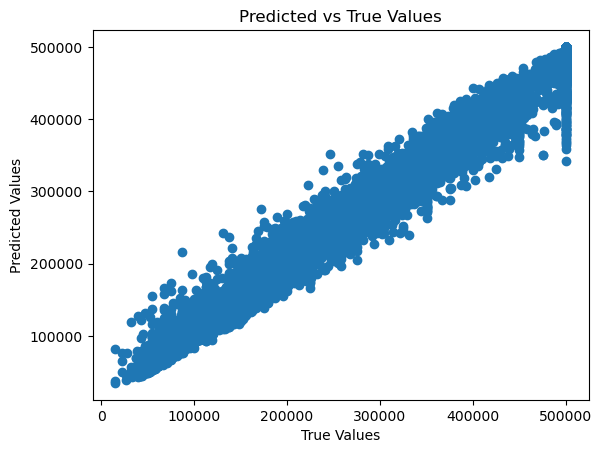

In [ ]:
plot_pred_true(y_pred,y_train)


In [ ]:
def display_scores(scores):
    print("scores:",scores)
    print("Mean:",scores.mean())
    print("Standard Deviation:",scores.std())


In [ ]:
display_scores(tree_rmse_score)


In [ ]:
#Test Data

In [89]:
X_test_prepared = pipelines.transform(X_test)


In [90]:
models = [lr_model,svm_model,tree_model,forest_model]

for model in models:
    test_pred = model.predict(X_test_prepared)
    plot_pred_true(test_pred,y_test)
    plt.show()


NameError: name 'svr_model' is not defined